In [4]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import os

In [52]:
def plots(fig, freqs, measures, order, ylabels=None, axi=True):
    colors = np.random.uniform(0,0.6, (len(list(measures.keys())), 3))
    
    for num, measure in enumerate(measures.keys()):
        if axi: 
            ax = fig.add_subplot(int(round(freqs.shape[0]*9/3)), 3, num + 1)
        else:
            ax = fig.axes[num]
        ax.plot(freqs[order], np.array(measures[measure], dtype='float')[order],
                    color = colors[num], marker = 'o', linestyle=':')
        ax.set_title((measure.upper()).replace('_', ' '), fontsize=25)
        ax.plot(0, 0, marker=' ', linestyle=' ')
        ax.grid()
        plt.xlabel('Hz', fontsize=15)
        if not(ylabels == None):
            plt.ylabel(ylabels[num], fontsize=15, rotation=0, labelpad=25)

    plt.tight_layout()
    
def read_measures_freqs(dataset_base_path):
    csvs_names = os.listdir(dataset_base_path)

    jpdaf_dir = [name for name in csvs_names if 'ennjpdaf' in name.split('_')]

    measures = {
        'vcl': [],
        'vsl': [],
        'vap_mean': [],
        'alh_mean': [],
        'lin': [],
        'wob': [],
        'str': [],
        'bcf_mean': [],
        'mad': [],
        'fluo': []
    }
    
    ylabels = [r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', 
              r'$\mu m$', '', '', '', 'Hz', r'$\mu m$', 'mgv']
    
    freqs = []
    for freq in jpdaf_dir:
        fps = (freq.split('Hz'))[0].split('_')[-1]
        freqs.append(fps)
        full_path_file = os.path.join(dataset_base_path, freq)
        freq_df = pd.read_csv(full_path_file)
        for measure in list(measures.keys()):
            measures[measure].append(freq_df[measure].mean())

    freqs = np.array(freqs, dtype='int')
    order = np.argsort(freqs)
    return freqs, measures, order, ylabels

def plot3D(dataset_base_path, name='out.png'):
    from mpl_toolkits.mplot3d import Axes3D
    csvs_names = os.listdir(dataset_base_path)

    jpdaf_dir = [name for name in csvs_names if 'ennjpdaf' in name.split('_')]
    
    measures = {
        'alh_mean': [],
        'wob': [],
        'str': [],
    }
    
    ylabels = ['alh', 'wob', 'str']
    
    freqs = []
    for freq in jpdaf_dir:
        fps = (freq.split('Hz'))[0].split('_')[-1]
        if fps == '30':
            fig = plt.figure()
            ax = Axes3D(fig)
            freqs.append(fps)
            full_path_file = os.path.join(dataset_base_path, freq)
            freq_df = pd.read_csv(full_path_file)
            
            ax.scatter(freq_df['str'], freq_df['wob'], freq_df['alh_mean'], marker='o')
            ax.set_xlabel('STR')
            ax.set_ylabel('WOB')
            ax.set_zlabel('ALH')
            plt.savefig(name)
    return

In [53]:
def read_measures_freqs_gt(dataset_base_path):
    csvs_names = os.listdir(dataset_base_path)

    jpdaf_dir = [name for name in csvs_names]

    measures = {
        'vcl': [],
        'vsl': [],
        'vap_mean': [],
        'alh_mean': [],
        'lin': [],
        'wob': [],
        'str': [],
        'bcf_mean': [],
        'mad': [],
        'fluo': []
    }
    
    ylabels = [r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', r'$\frac{\mu m}{s}$', 
              r'$\mu m$', '', '', '', 'Hz', r'$\mu m$', 'mgv']
    
    freqs = []
    for freq in jpdaf_dir:
        fps = (freq.split('Hz'))[0].split('(')[-1]
        freqs.append(fps)
        full_path_file = os.path.join(dataset_base_path, freq)
        freq_df = pd.read_csv(full_path_file)
        for measure in list(measures.keys()):
            measures[measure].append(freq_df[measure].mean())

    freqs = np.array(freqs, dtype='int')
    order = np.argsort(freqs)
    return freqs, measures, order, ylabels

In [54]:
indir = 'measures_on_gt'
dataset = 'dataset_1'

dataset_base_path = os.path.join(indir, dataset)
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
#plots(freqs, measures, order, ylabels)
plot3D(dataset_base_path)

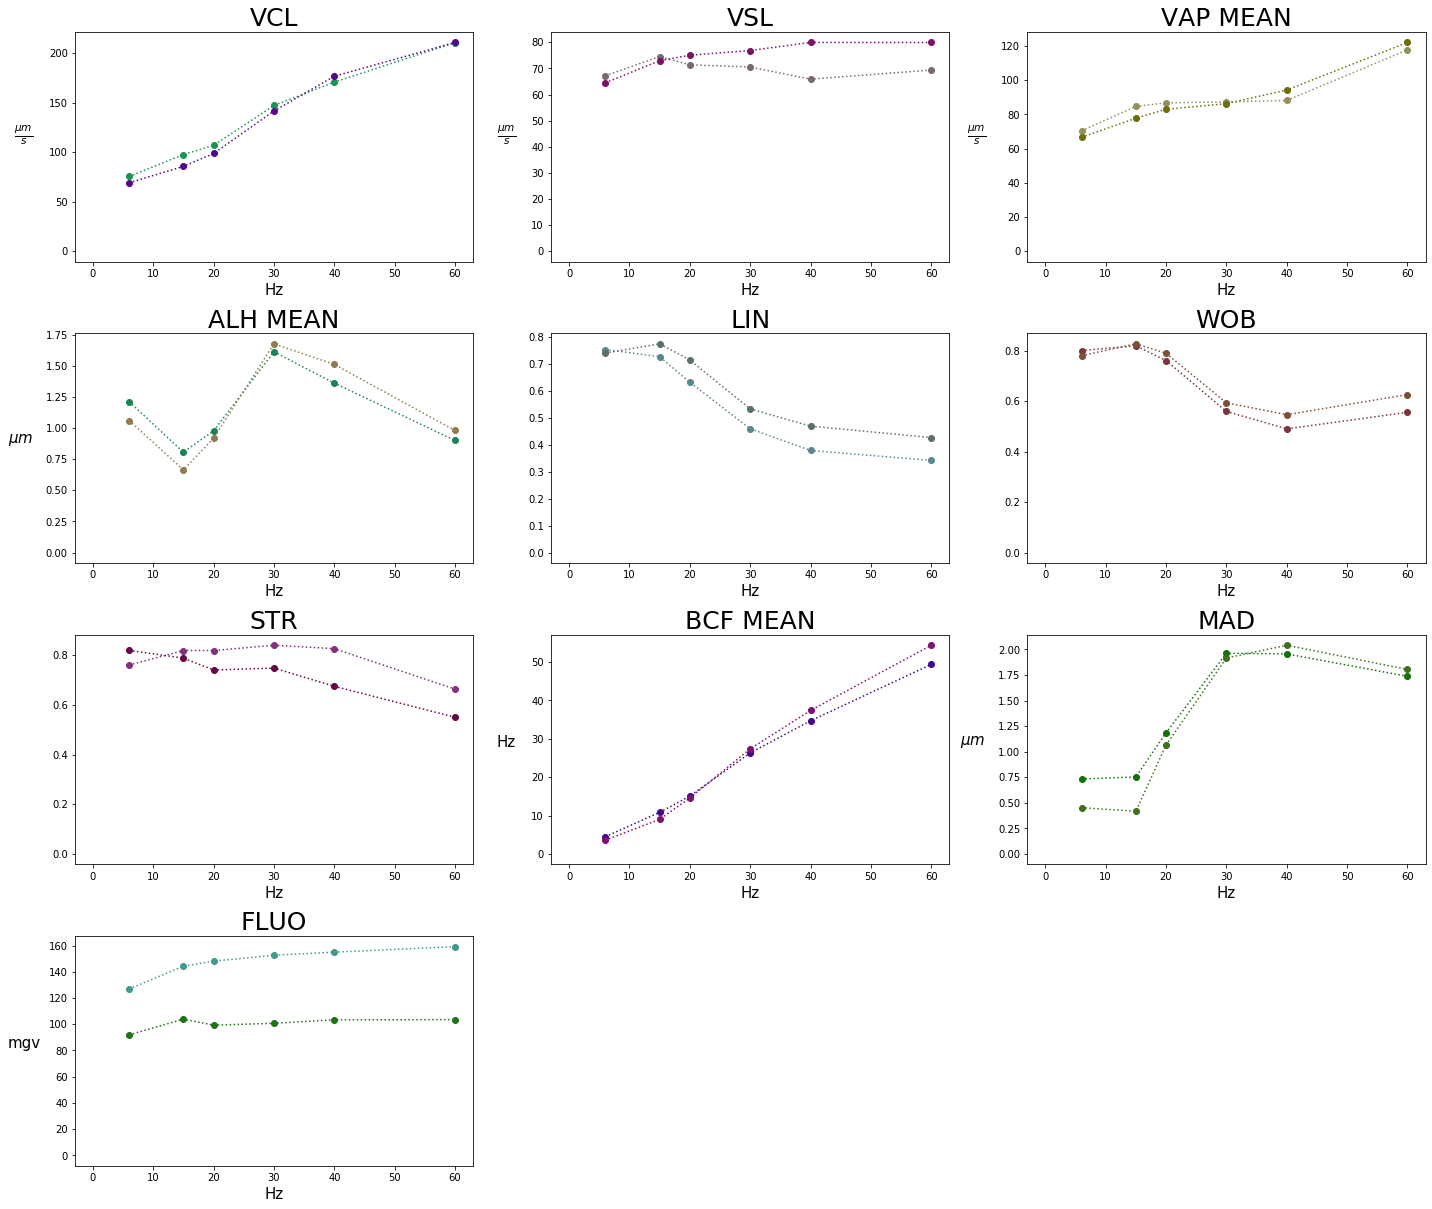

In [55]:
%matplotlib inline
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_1'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

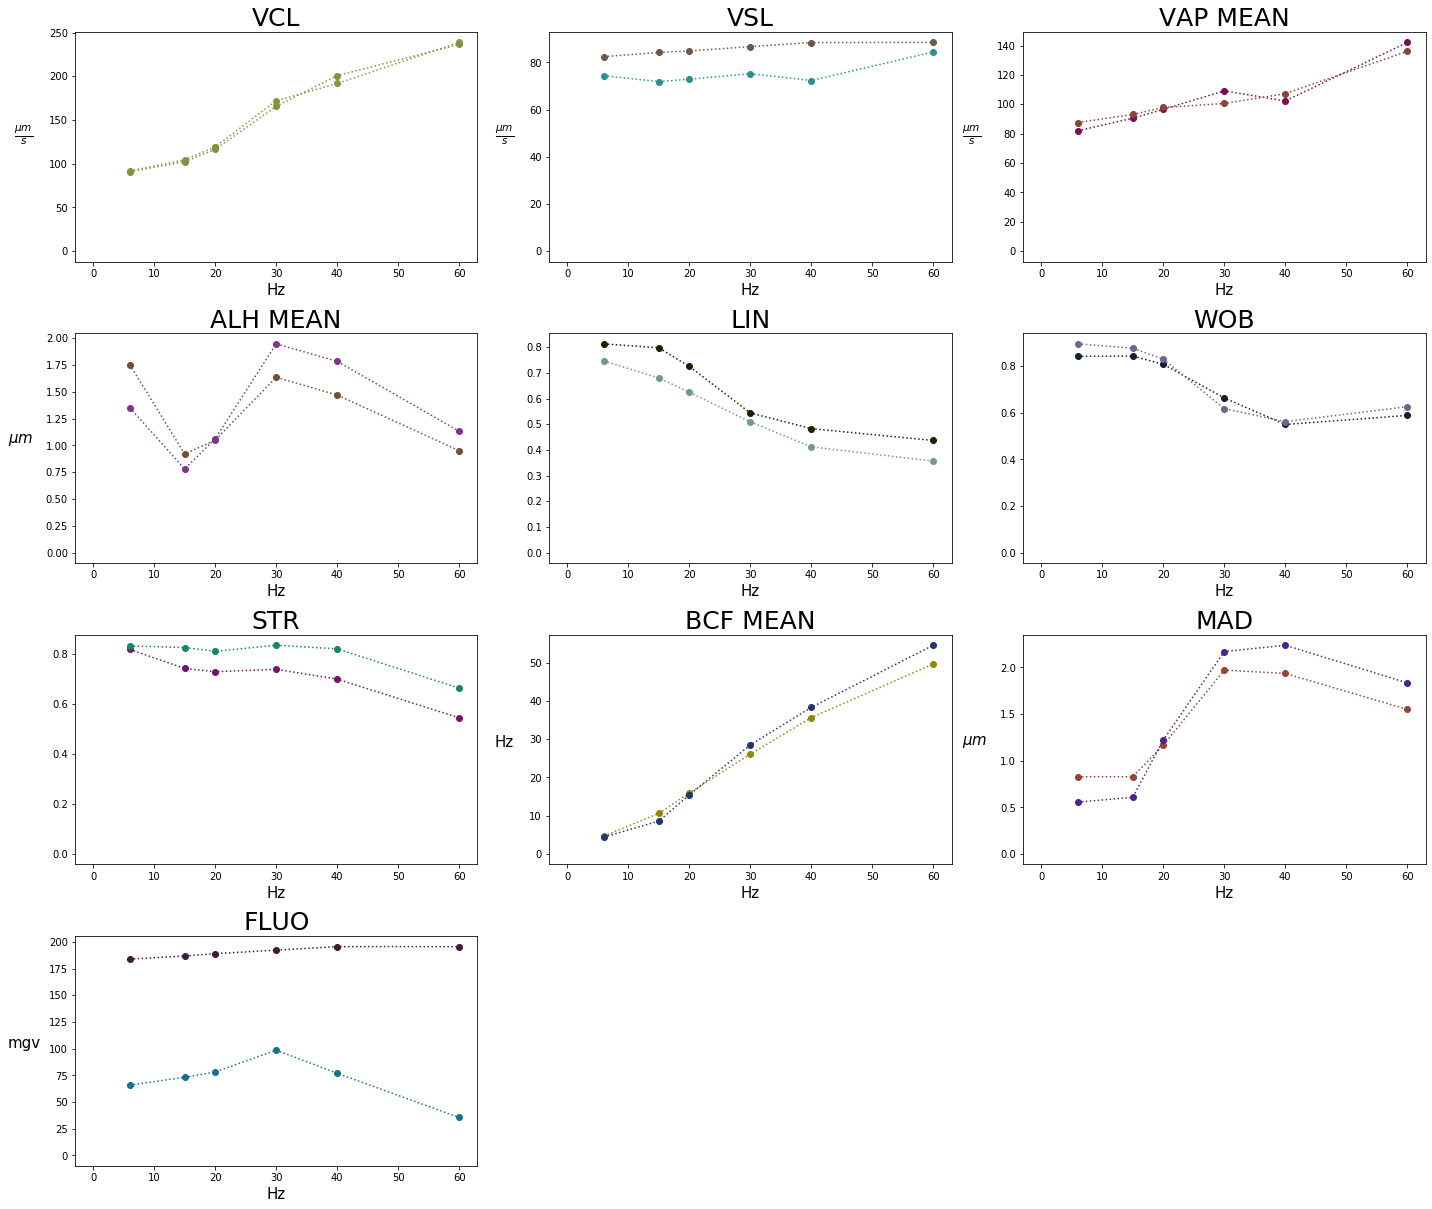

In [56]:
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_2'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

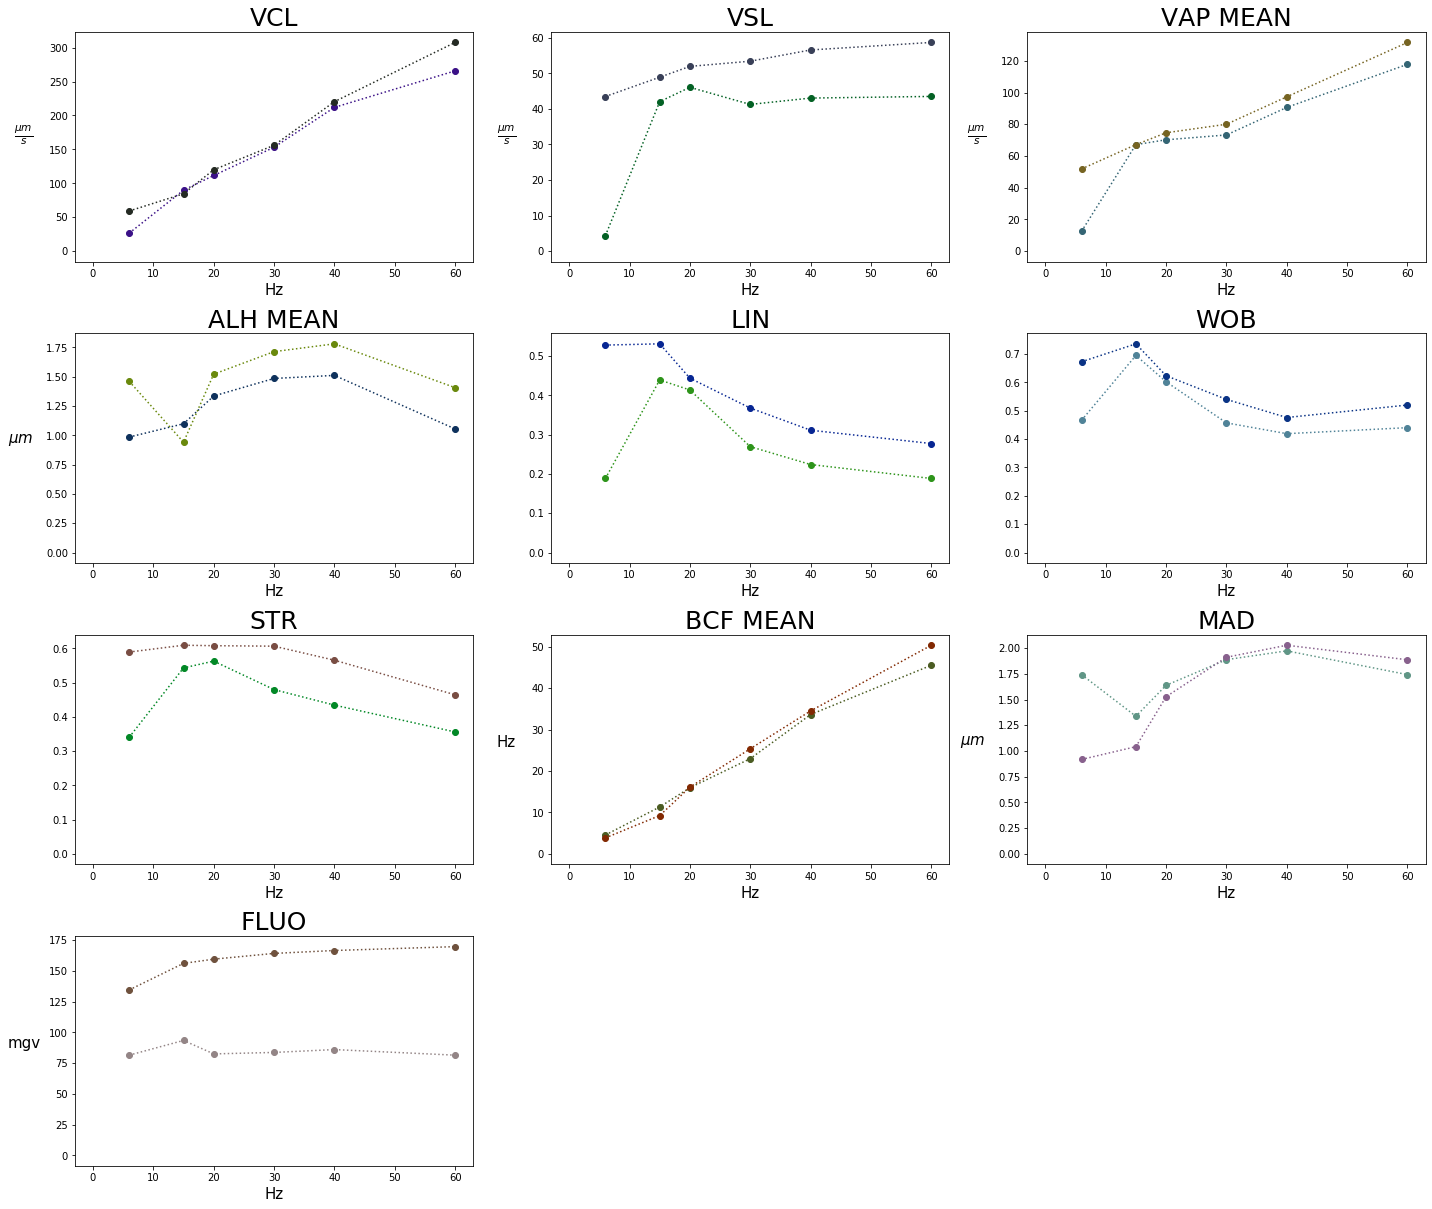

In [57]:
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_3'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

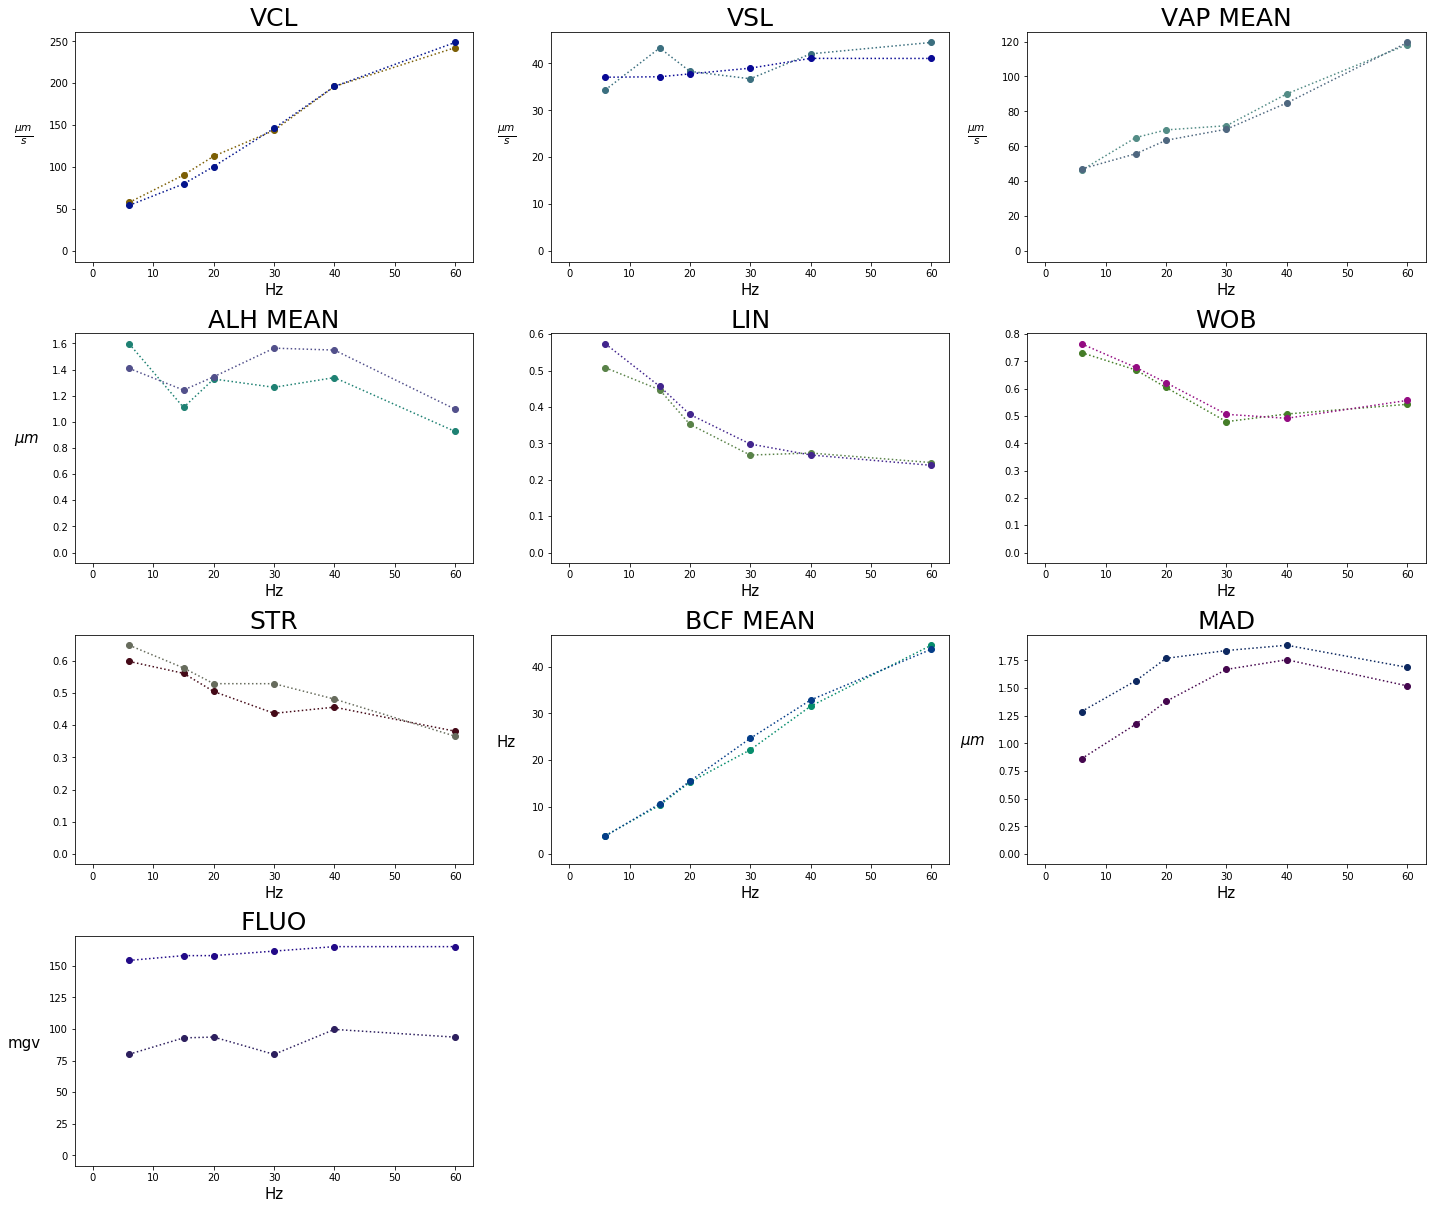

In [58]:
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_4'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

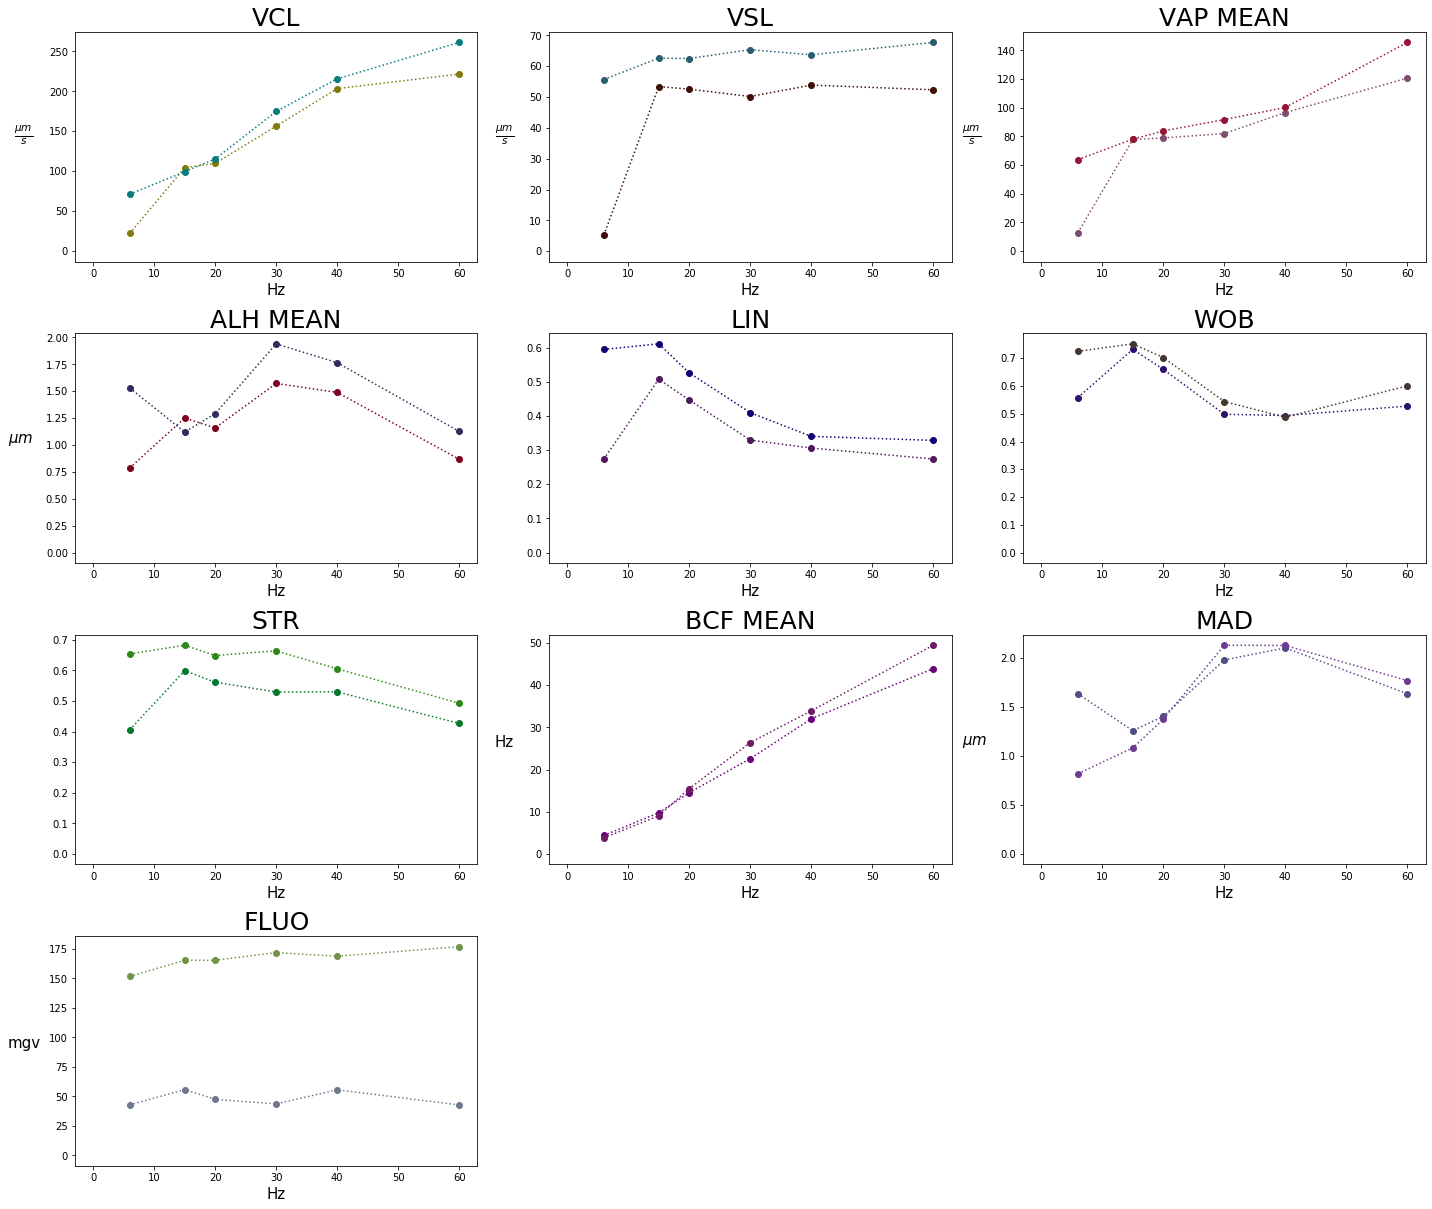

In [60]:
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_5'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

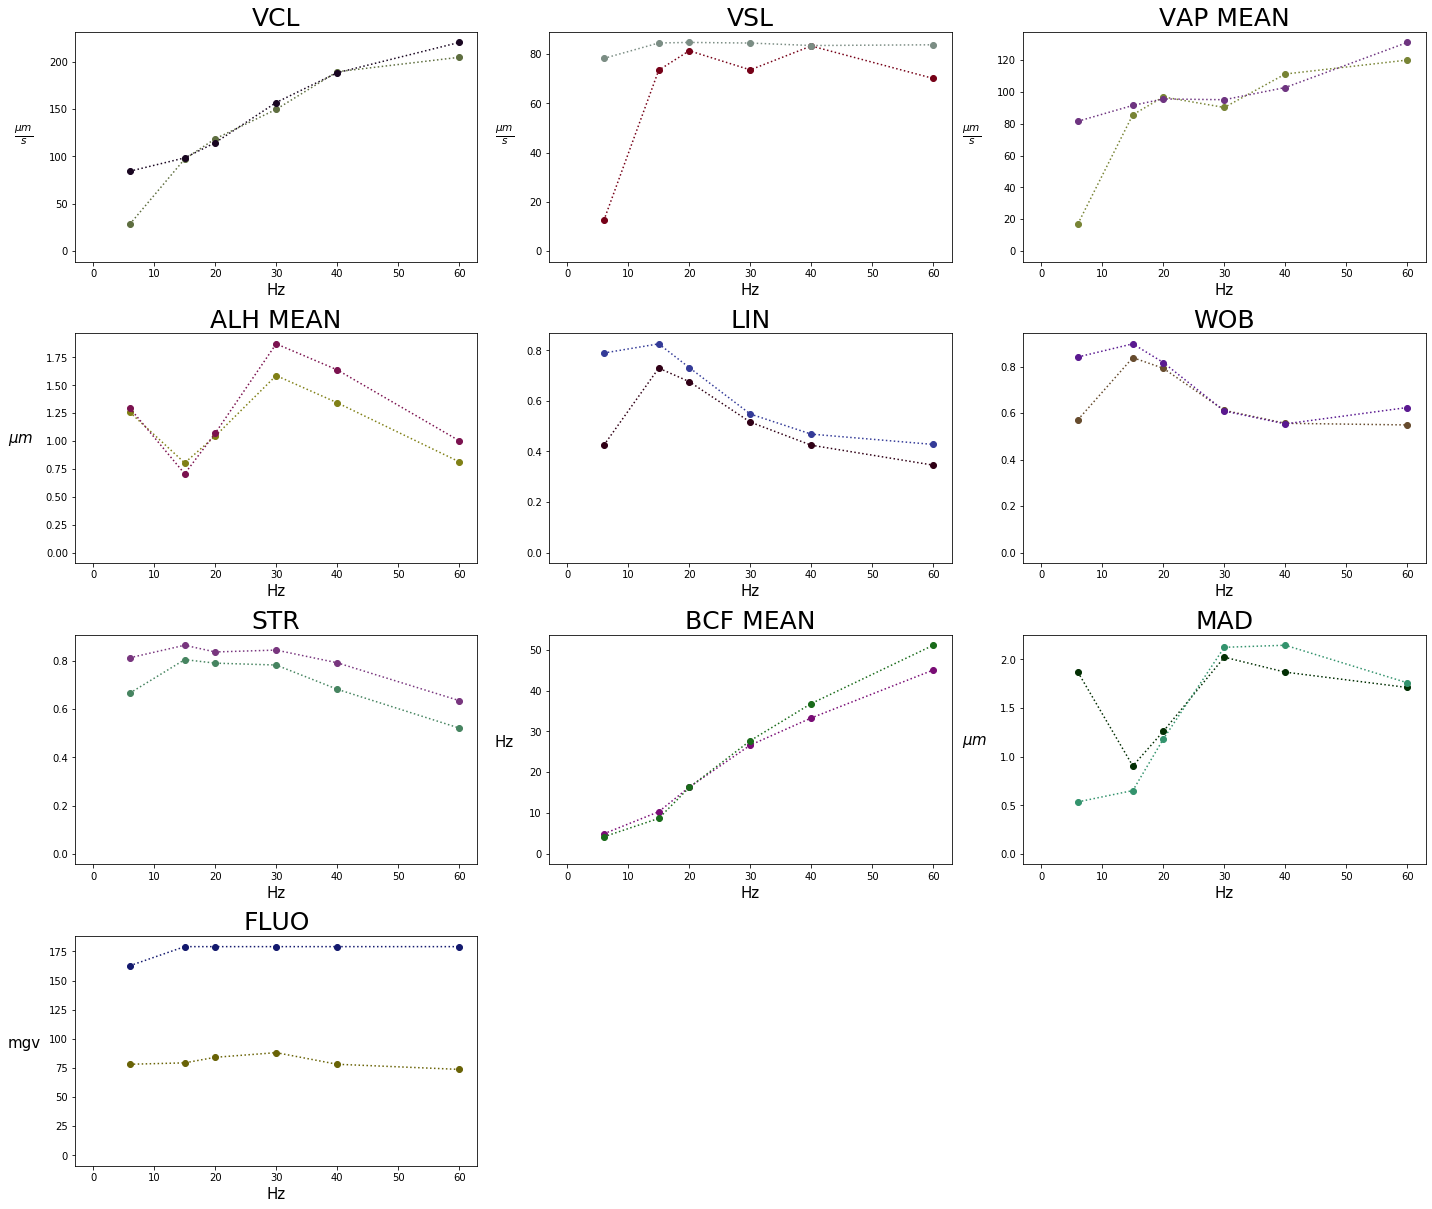

In [61]:
indir = 'measures_tracking'
indir_gt = 'measures_on_gt'
dataset = 'dataset_6'

dataset_base_path = os.path.join(indir, dataset)
fig = plt.figure(figsize=(20, 75))
freqs, measures, order, ylabels = read_measures_freqs(dataset_base_path)
plots(fig, freqs, measures, order, ylabels)
dataset_base_path = os.path.join(indir_gt, dataset)
freqs, measures, order, ylabels = read_measures_freqs_gt(dataset_base_path)
plots(fig, freqs, measures, order, ylabels, axi=False)
plt.show()

59
57


Text(0, 0.5, 'fluo')

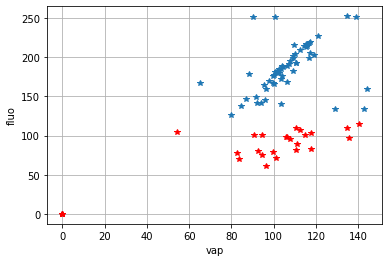

In [78]:
full_path_file = 'measures_on_gt/dataset_6/dataset_6(40Hz)_data_WHO.csv'

freq_df = pd.read_csv(full_path_file)
vap_freq =[[v, f] for v,f in zip(freq_df['vap_mean'], freq_df['fluo'])]
print(len(vap_freq))
v, f = [v[0] for v in vap_freq], [f[1] for f in vap_freq]
plt.plot(v, f, marker='*', linestyle=' ')

full_path_file = 'measures_tracking/dataset_6/dataset_6_40Hz_ennjpdaf_WHO.csv'
freq_df = pd.read_csv(full_path_file)
vap_freq =[[v, f] for v,f in zip(freq_df['vap_mean'], freq_df['fluo'])]
print(len(vap_freq))
v, f = [v[0] for v in vap_freq], [f[1] for f in vap_freq]
plt.plot(v, f, marker='*', linestyle=' ', color='r')

plt.plot(0, 0, marker='None')
plt.xlabel('vap')
plt.grid()
plt.ylabel('fluo')

In [54]:
freq_df

,track_id,vcl,vsl,vap_mean,vap_std,alh_mean,alh_std,lin,wob,str,bcf_mean,bcf_std,mad,fluo
0,1,351.915139,80.912597,239.160067,726.579752,1.098227,1.029782,0.229921,0.679596,0.338320,20.000000,0.000000,1.771702,NaN
1,2,190.170079,90.424840,117.883603,91.387856,0.920058,0.678912,0.475495,0.619885,0.767069,56.000000,12.000000,1.266958,96.533875
2,3,680.992126,30.874391,321.956055,7517.295859,2.655935,2.475304,0.045337,0.472775,0.095896,41.766667,20.398012,1.960515,100.168675
3,4,181.840387,104.195544,138.577793,80.603363,0.726301,0.430125,0.573006,0.762085,0.751892,51.071429,13.716332,2.497057,NaN
4,5,466.743431,24.926764,324.943644,12070.108774,1.262273,1.185088,0.053406,0.696193,0.076711,38.742347,20.664704,1.639742,86.761628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,88,428.823411,42.178051,156.994240,1458.383689,1.503307,1.728471,0.098358,0.366105,0.268660,30.000000,15.491933,2.308195,NaN
63,89,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64,90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
65,91,222.716342,91.979930,125.049500,65.281239,1.158887,0.856615,0.412991,0.561474,0.735548,60.000000,0.000000,1.447018,104.099602


In [1]:
full_path_file = 'measures/dataset_4/dataset_4_60Hz_ennjpdaf_WHO.csv'
freq_df = pd.read_csv(full_path_file)
print(len(freq_df['fluo']), len(freq_df['fluo']) - freq_df['fluo'].count())
print(len(freq_df[freq_df['vap_mean']==0]))
v, f = freq_df['vap_mean'].to_numpy(), freq_df['fluo'].to_numpy()
plt.plot(v, f, marker='*', linestyle=' ')
plt.xlabel('vap')
plt.ylabel('fluo')

NameError: name 'pd' is not defined

# REAL DATA

In [10]:
!ls real_sequences/

1 026          11             9              tracks_WHO.csv
10             4              tiff_files


In [12]:
indir = 'real_sequences/1 026/tracks_WHO.csv'
csv = pd.read_csv(indir)

Text(0, 0.5, 'fluo')

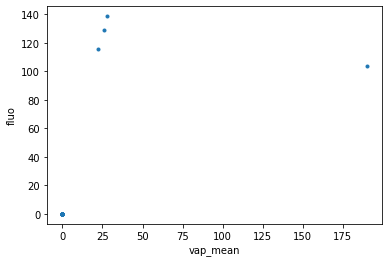

In [13]:
plt.plot(csv['vap_mean'], csv['fluo'], marker='.', linestyle=' ')
plt.xlabel('vap_mean')
plt.ylabel('fluo')

<IPython.core.display.Javascript object>


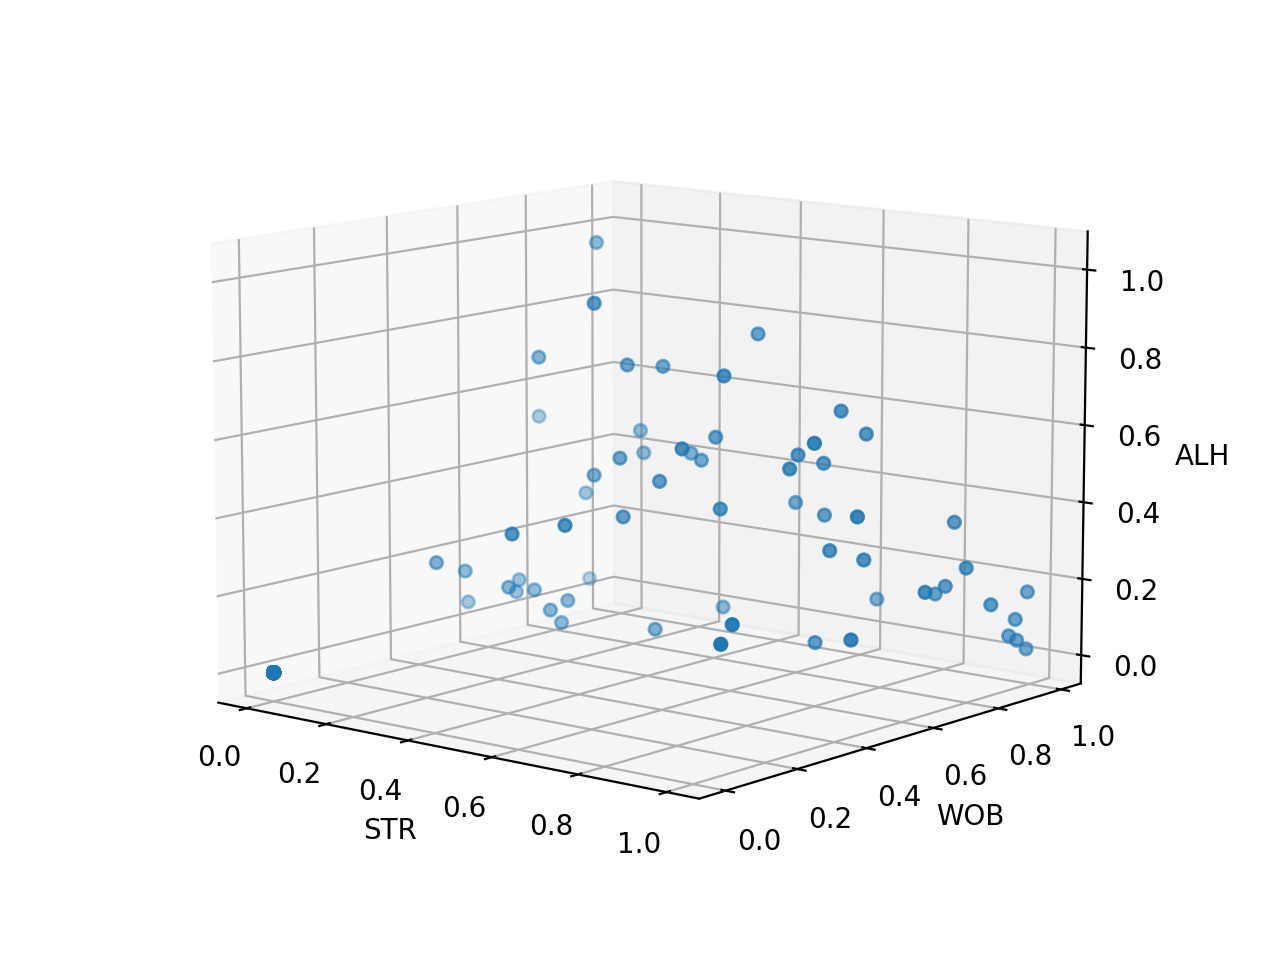

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(csv['str'], csv['wob'], csv['alh_mean'], marker='o')
ax.set_xlabel('STR')
ax.set_ylabel('WOB')
ax.set_zlabel('ALH')
plt.show()

In [26]:
from sklearn.cluster import KMeans 

str_list, wob_list, alh_list = º].to_list(), csv['wob'].to_list(), csv['alh_mean'].to_list()
values = [(stra, wob, alh) for stra, wob, alh in zip(str_list, wob_list, alh_list)]

kmeans = KMeans(n_clusters=3).fit(values)
labels = kmeans.predict(values)

<IPython.core.display.Javascript object>


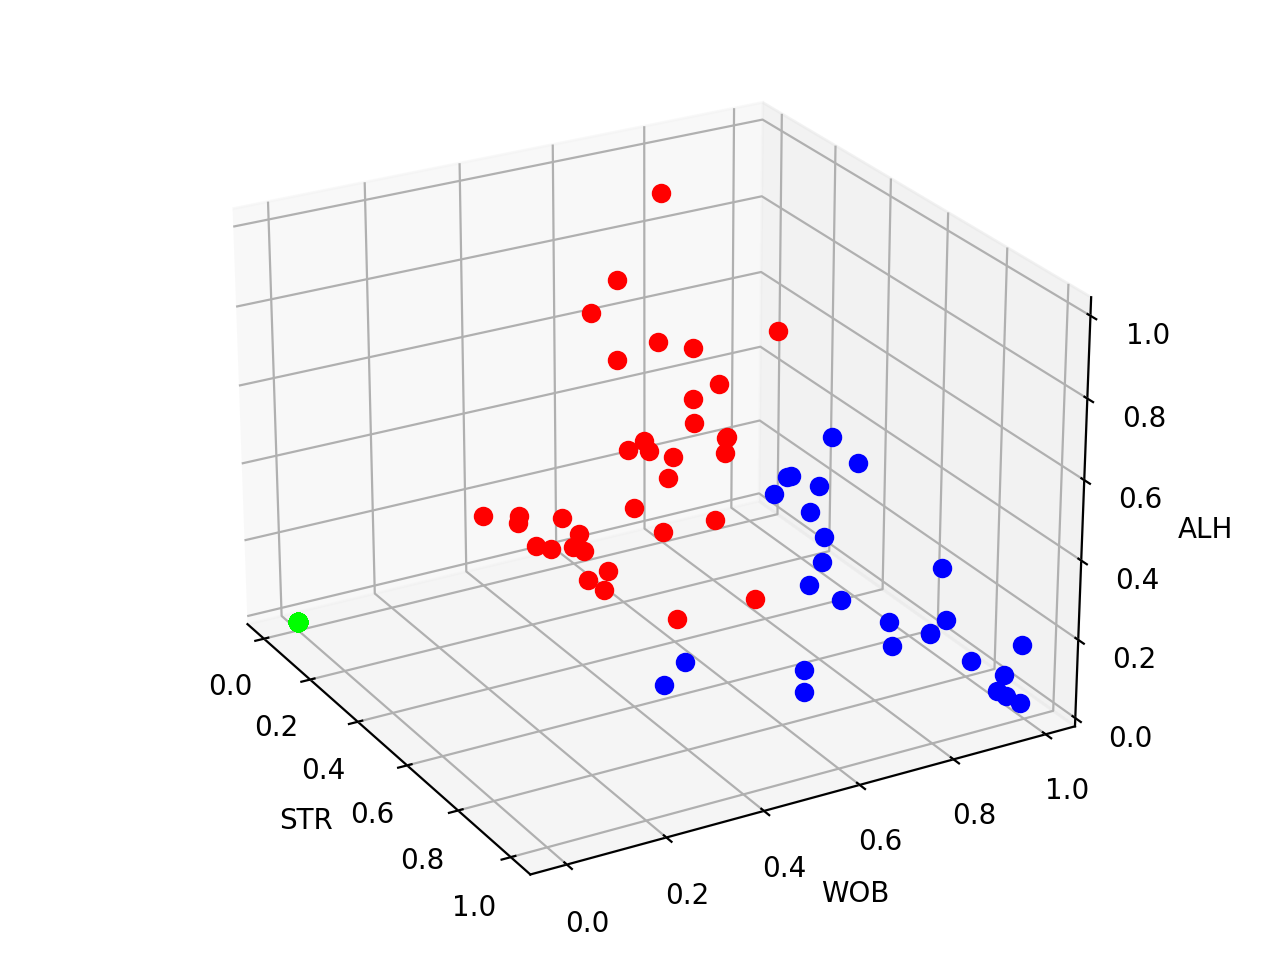

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

colors = [(1,0,0), (0,1,0), (0,0,1)]

for it, label in enumerate(labels):
    
    ax.plot(values[it][0], values[it][1], values[it][2], marker='o', color=colors[label])
ax.set_xlabel('STR')
ax.set_ylabel('WOB')
ax.set_zlabel('ALH')
plt.show()

In [2]:
!jupyter nbconvert degradation_plots.ipynb --to=pdf --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook degradation_plots.ipynb to pdf
[NbConvertApp] Support files will be in degradation_plots_files/
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Making directory ./degradation_plots_files
[NbConvertApp] Writing 31939 bytes to ./notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(Jupy

In [5]:
!pip install ntbconvert

ERROR: Could not find a version that satisfies the requirement ntbconvert (from versions: none)
ERROR: No matching distribution found for ntbconvert
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
